In [86]:
from glob import glob
import pandas as pd
from matplotlib import pyplot as plt

In [140]:
%cd C:\Users\qorwl\yolov5_py38\yolov5-master\runs\detect\

C:\Users\qorwl\yolov5_py38\yolov5-master\runs\detect


In [141]:
txt_list = glob('./test_pistol1_yolo/labels/*.txt') #YOLO
print(len(txt_list))
txt_list2 = glob('./test_pistol1_Kalman7/labels/*.txt')#YOLO
print(len(txt_list2))

282
282


In [142]:
with open('./test_pistol1_yolo/test.txt', 'w') as f:
  f.write('\n'.join(txt_list) + '\n')

In [143]:
with open('./test_pistol1_Kalman7/test2.txt', 'w') as f:
  f.write('\n'.join(txt_list2) + '\n')

In [144]:
filenames = []
f = open('./test_pistol1_yolo/test.txt', 'r')
while True:
    line = f.readline()
    line = line[0:-1]
    filenames.append((line))
    if not line: 
        print(len(filenames))
        break
    
f.close()

283


In [145]:
filenames2 = []
f= open('./test_pistol1_Kalman7/test2.txt', 'r')
while True:
    line2 = f.readline()
    line2 = line2[0:-1]
    filenames2.append((line2))
    if not line2: 
        print(len(filenames2))
        break
    
f.close()

283


In [146]:
with open('./test_pistol1_yolo/merge.txt', 'w') as outfile:
    for filename in filenames:
        if filename == '':
            break
        with open(filename) as file:
            for line in file:
                outfile.write(line)


In [147]:
with open('./test_pistol1_Kalman7/merge2.txt', 'w') as outfile:
    for filename2 in filenames2:
        if filename2 == '':
            break
        with open(filename2) as file:
            for line2 in file:
                outfile.write(line2)

In [148]:
df = pd.read_csv(
    './test_pistol1_yolo/merge.txt', sep=" ",header=None)

df2 = pd.read_csv(
    './test_pistol1_Kalman7/merge2.txt', sep=" ",header=None)


In [149]:
df.rename(columns = {1 : 'Yolo_x', 2:'Yolo_y',3:'Yolo_w', 4: 'Yolo_h', 5:'Yolo_conf'}, inplace = True)
print(df[7:15])

    0    Yolo_x    Yolo_y    Yolo_w    Yolo_h  Yolo_conf
7   0  0.495313  0.465278  0.325000  0.486111   0.903616
8   0  0.495313  0.466667  0.326042  0.483333   0.906952
9   0  0.494271  0.468519  0.323958  0.483333   0.907508
10  0  0.494271  0.471759  0.322917  0.486111   0.906357
11  0  0.492969  0.476389  0.322396  0.487963   0.907389
12  0  0.509896  0.329630  0.334375  0.531482   0.869529
13  0  0.492188  0.476852  0.322917  0.487037   0.907146
14  0  0.491406  0.477778  0.323438  0.488889   0.905901


In [150]:
df2.rename(columns = {1 : 'Kalman_x', 2:'Kalman_y',3:'Kalman_w', 4: 'Kalman_h', 5:'Kalman_conf'}, inplace = True)
print(df2[7:15])

    0  Kalman_x  Kalman_y  Kalman_w  Kalman_h  Kalman_conf
7   0  0.496875  0.461111  0.325000  0.485185     0.903616
8   0  0.495312  0.466667  0.326042  0.483333     0.906952
9   0  0.495312  0.466667  0.323958  0.483333     0.907508
10  0  0.493750  0.469444  0.322917  0.485185     0.906357
11  0  0.493750  0.472222  0.322917  0.488889     0.907389
12  0  0.512500  0.322222  0.334375  0.531481     0.869529
13  0  0.493750  0.477778  0.322917  0.487037     0.907146
14  0  0.492188  0.477778  0.323958  0.488889     0.905901


In [151]:
%cd C:\Users\qorwl\yolov5_py38\yolov5-master

C:\Users\qorwl\yolov5_py38\yolov5-master


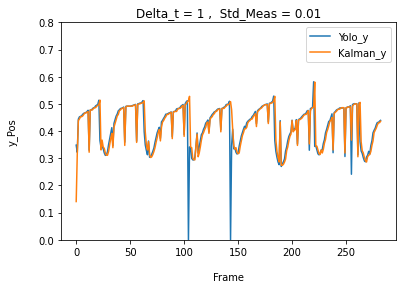

In [152]:
plt.plot(df['Yolo_y'], label ='Yolo_y')
plt.plot(df2['Kalman_y'], label ='Kalman_y')
plt.xlabel('Frame', labelpad=15)
plt.ylabel('y_Pos', labelpad=20)
plt.title('Delta_t = 1 ,  Std_Meas = 0.01')
plt.ylim(0,0.8)
plt.legend(loc='upper right')
plt.savefig('./img/est/T_1_SM_001_Y')
plt.show()

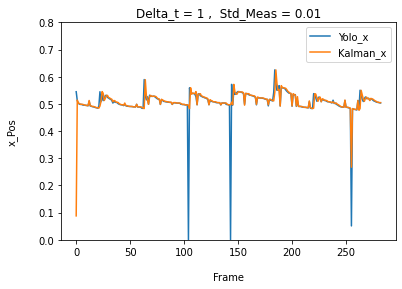

In [153]:
plt.plot(df['Yolo_x'], label ='Yolo_x')
plt.plot(df2['Kalman_x'], label ='Kalman_x')
plt.xlabel('Frame', labelpad=15)
plt.ylabel('x_Pos', labelpad=20)
plt.title('Delta_t = 1 ,  Std_Meas = 0.01')
plt.ylim(0,0.8)
plt.legend(loc='upper right')
plt.savefig('./img/est/T_1_SM_001_X')
plt.show()